# Linear Regression Model

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Least Squares Method Explained

Consider for example the following data set:

|X | y | xy | x^2|
|---|---|---|---|
| 1 | 1.5 | 1.5 | 1 |
| 2 | 3.8 | 7.6 | 4 |
| 3 | 6.7 | 20.1 | 9 |
| 4 | 9 | 36 | 16 |
| 5 | 11.2 | 56 | 25 |
| 6 | 13.6 | 81.6 | 36 |
| 7 | 16 | 112 | 49 |

| $\sum X$ | $\sum y$ | $\sum xy$ | $\sum x^2$ |
|---|---|---|---|
| 28 | 61.8 | 315.8 | 140 |

$ y = mx + b $  where m is the slope and b is the y intercept

or 

$ y = b_{0} + b_{1}x $  statistican notation

$slope = m = b_{1}$  slope is the same as the y intercept

$ y - int = b_{1} = b_{0}$  y intercept is the same as the slope

$ m = n \sum xy - \sum x \sum y \over n \sum x^2 - (\sum x)^2 $  slope

n = 7 (number of data points) 

$ m = 7 * 315.8 - 28 * 61.8 \over 7 * 140 - 28^2 $

$ m = 2.4142857 $

$ b = \sum y - m \sum x \over n $  y intercept

$ b = 61.8 - 2.4142857 * 28 \over 7 $

$ b = -0.828571 $

$ y = 2.4142857x - 0.828571 $   Linear Regression Model

### Testing the Model

$ y = 2.4142857(2) - 0.828571 $ = 3.9

$ y = 2.4142857(5) - 0.828571 $ = 11.22

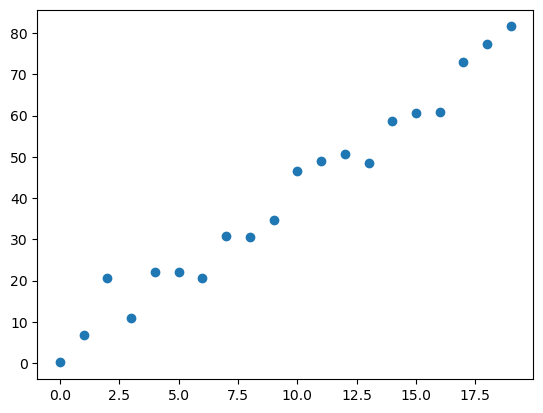

In [35]:
n = 20

X = np.arange(n)

y = 4*X + 3 + 3*( np.random.randn(X.size)) # a = 4, b (3 + 3 * randn(20))

plt.scatter(X, y)


In [36]:
X.shape

(20,)

In [37]:
y.shape

(20,)

In [38]:
one = np.ones((X.size, 1)) # creating a column of ones

In [39]:
one

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [40]:
X2 = np.hstack((X[:,np.newaxis], one)) # adding a column of ones to X

In [41]:
X2

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.]])

In [42]:
y = y[:,np.newaxis] # reshaping y to a column vector
print(f'Shape of X2: {X2.shape}\nShape of y: {y.shape}')

Shape of X2: (20, 2)
Shape of y: (20, 1)


In [43]:
np.linalg.lstsq?

Signature: np.linalg.lstsq(a, b, rcond='warn')
Docstring:
Return the least-squares solution to a linear matrix equation.

Computes the vector `x` that approximately solves the equation
``a @ x = b``. The equation may be under-, well-, or over-determined
(i.e., the number of linearly independent rows of `a` can be less than,
equal to, or greater than its number of linearly independent columns).
If `a` is square and of full rank, then `x` (but for round-off error)
is the "exact" solution of the equation. Else, `x` minimizes the
Euclidean 2-norm :math:`||b - ax||`. If there are multiple minimizing
solutions, the one with the smallest 2-norm :math:`||x||` is returned.

Parameters
----------
a : (M, N) array_like
    "Coefficient" matrix.
b : {(M,), (M, K)} array_like
    Ordinate or "dependent variable" values. If `b` is two-dimensional,
    the least-squares solution is calculated for each of the `K` columns
    of `b`.
rcond : float, optional
    Cut-off ratio for small singular values o

In [44]:
result = np.linalg.lstsq(X2, y, rcond=-1) # this function calculates the least squares solution

In [45]:
result

(array([[3.97729142],
        [2.54382033]]),
 array([314.44499237]),
 2,
 array([49.84623483,  2.31362763]))

In [46]:
result[0] # The actual parameters

array([[3.97729142],
       [2.54382033]])

In [47]:
y_pred = result[0][0] * X + result[0][1]
y_pred

array([ 2.54382033,  6.52111175, 10.49840317, 14.47569459, 18.45298601,
       22.43027743, 26.40756885, 30.38486028, 34.3621517 , 38.33944312,
       42.31673454, 46.29402596, 50.27131738, 54.24860881, 58.22590023,
       62.20319165, 66.18048307, 70.15777449, 74.13506591, 78.11235733])

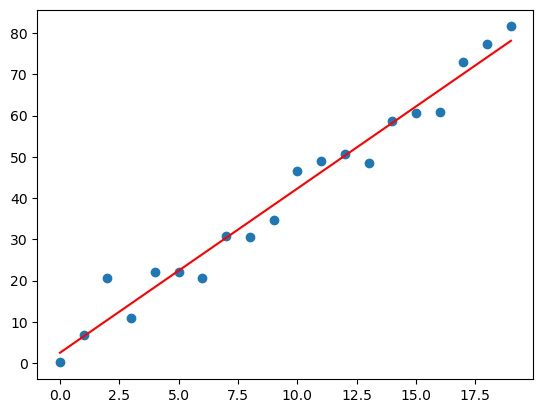

In [48]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

In [49]:
lni = X2 @ result[0]
lni

array([[ 2.54382033],
       [ 6.52111175],
       [10.49840317],
       [14.47569459],
       [18.45298601],
       [22.43027743],
       [26.40756885],
       [30.38486028],
       [34.3621517 ],
       [38.33944312],
       [42.31673454],
       [46.29402596],
       [50.27131738],
       [54.24860881],
       [58.22590023],
       [62.20319165],
       [66.18048307],
       [70.15777449],
       [74.13506591],
       [78.11235733]])

In [50]:
model = LinearRegression()
model.fit(X[:,np.newaxis], y)
y_pred = model.predict(X[:,np.newaxis])

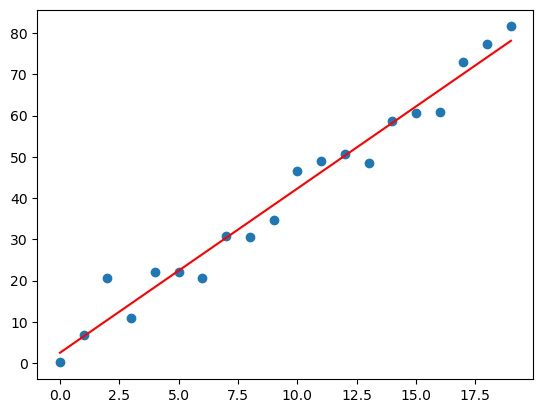

In [51]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

Text(0.5, 1.0, 'numpy')

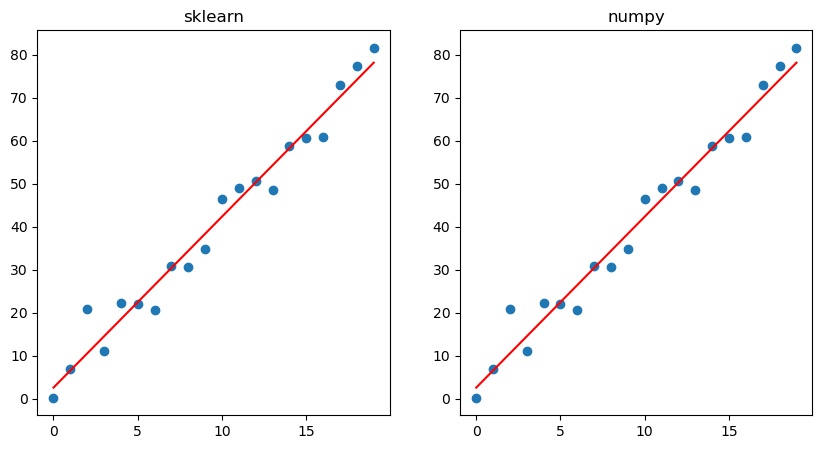

In [52]:
# subplot to compare the two models

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X, y)
ax[0].plot(X, y_pred, 'r')
ax[0].set_title('sklearn')
ax[1].scatter(X, y)
ax[1].plot(X, lni, 'r')
ax[1].set_title('numpy')



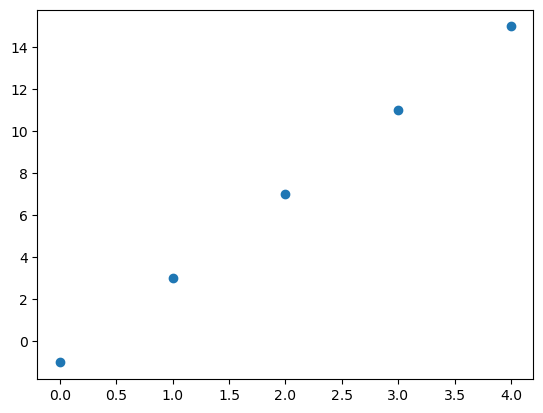

In [53]:
n = 5
X = np.arange(n)

y = 4*X - 1

plt.scatter(X, y)

Is the model correct? True


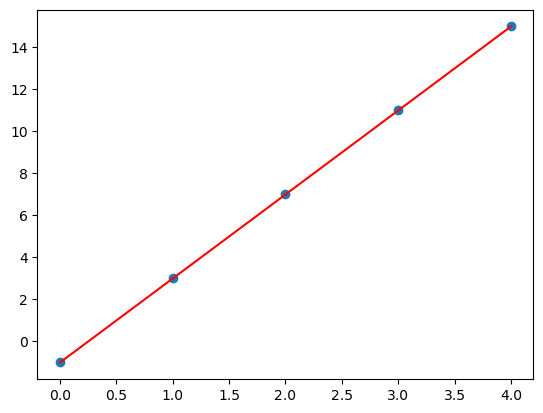

In [54]:
r"""

Least Square method

X = [0, 1, 2, 3, 4]
Y = [-1, 3, 7, 11, 15]

SUM x = 10
SUM y = 35

SUM x^2 = 30
SUM xy = 110 // 0 + 3 + 14 + 33 + 60 = 110

m = (n*SUM xy - SUM x * SUM y) / (n*SUM x^2 - (SUM x)^2)
m = 4

b = (SUM y - m*SUM x) / n
b = -1

"""

def sum_of_array(arr):
    return np.sum(arr)

def sum_of_squares(arr):
    return np.sum(arr**2)

def sum_of_product(arr1, arr2):
    return np.sum(arr1*arr2)

def least_square(X, y):
    n = X.size

    sum_x = sum_of_array(X)
    sum_y = sum_of_array(y)

    sum_x2 = sum_of_squares(X)
    sum_xy = sum_of_product(X, y)

    m = (n*sum_xy - sum_x*sum_y) / (n*sum_x2 - sum_x**2)
    b = (sum_y - m*sum_x) / n

    return m, b

m, b = least_square(X, y)
y_pred = m*X + b
y_pred = y_pred[:,np.newaxis]

print(f'Is the model correct? {np.allclose(y_pred, y[:,np.newaxis])}')

# graph comparing the two models

plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

Text(0.5, 1.0, 'My model')

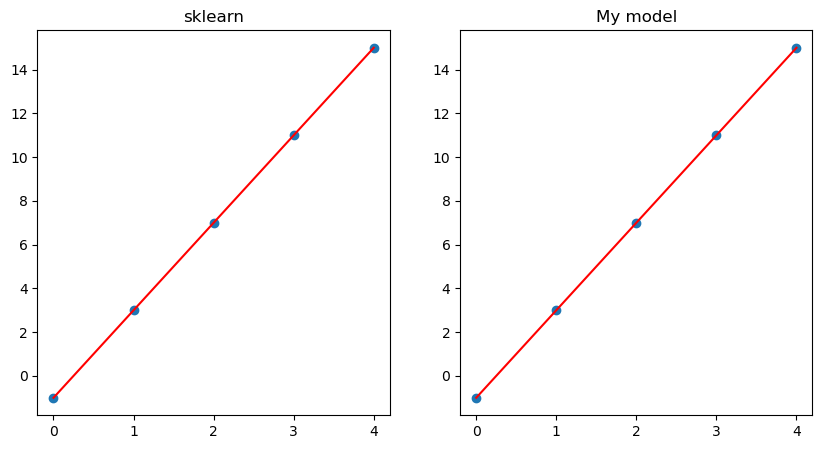

In [57]:
model = LinearRegression()
model.fit(X[:,np.newaxis], y)
y_pred = model.predict(X[:,np.newaxis])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X, y)
ax[0].plot(X, y_pred, 'r')
ax[0].set_title('sklearn')
ax[1].scatter(X, y)
ax[1].plot(X, y_pred, 'r')
ax[1].set_title('My model')



